In [213]:
import sys
import math
sys.path.insert(0,'../RandomGenerator/')
sys.path.insert(0,'../Cryptographie/RSA/')
from PrimeNumber import *
from RNG_UsualLaw_Continue import *
from scipy.stats import norm
from scipy.special import ndtri
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import time

Don't give importance to the computentional time because we mostly study convergence in this Jupyter Book

## Monte Carlo for Integral

Monte Carlo method to compute
$\begin{equation*}
\int_a^b f(x) dx
\end{equation*}$


Function to evaluate :

In [572]:
def f1(x):
    return(1/(1+x))

def f2(x):
    return(x*x + 2*x -3)

In [627]:
def MC(f,a,b,N=1000,alpha=0.05,conv=False):
    exact_result = integrate.quad(f,a,b)[0]
    res = []
    conv = []
    sample = Uniform_Continue(a,b,N)
    for i in range(N):
        res.append((b-a)*f(sample[i]))
        conv.append(abs(exact_result-np.mean(res)))
    sigma = np.std(res)
    sigma2 = np.var(res)
    quantil = ndtri(1-alpha/2)
    res = np.mean(res)
    print("Standard deviation :", sigma)
    print("Variance :",sigma2)
    print("Confidence interval of", 1-alpha,"% : [", res - quantil*sigma/math.sqrt(N), " : ",res + quantil*sigma/math.sqrt(N),"]")
    return res,conv

In [574]:
res,_ = MC(f1,0,1,N=3000)
print(res)
exact_result = integrate.quad(f1,0,1)
print("Exact result :",exact_result)

Standard deviation : 0.1396091760778393
Variance : 0.019490722045133132
Confidence interval of 0.95 % : [ 0.6889418782118308  :  0.6989333950217367 ]
0.6939376366167838
Exact result : (0.6931471805599454, 7.695479593116622e-15)


# Variance Reduction

### Antithetic variable

In [628]:
def MC_anthitetic(f,a,b,N=1000,alpha=0.05):
    exact_result = integrate.quad(f,a,b)[0]
    sample = Uniform_Continue(a,b,N)
    res = []
    conv = []
    for i in range(N):
        val = (b-a)* (f(sample[i]) + f(b-sample[i]+a))/2
        res.append(val)
        conv.append(abs(exact_result-np.mean(res)))
    sigma = np.std(res)
    sigma2 = np.var(res)
    res = np.mean(res)
    print("Standard deviation :", sigma)
    print("Variance :",sigma2)
    quantil = ndtri(1-alpha/2)
    print("Confidence interval of", 1-alpha,"% : [", res - quantil*sigma/math.sqrt(N), " : ",res + quantil*sigma/math.sqrt(N),"]")
    return res,conv

In [582]:
N=10000
print('\033[1m' + "Monte Carlo Standard : " + '\033[0m')
start_time = time.time()
res1,_ = MC(f1,0,1,N)
print("Result :",res1,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f1,0,1)[0]-res1),"\n \n")
print('\033[1m' + "Monte Carlo Antithetic Variates : " + '\033[0m')
start_time = time.time()
res2,_ = MC_anthitetic(f1,0,1,N)
print("Result :",res2,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f1,0,1)[0]-res2))

Monte Carlo Standard : 
Standard deviation : 0.13970730048167693
Variance : 0.019518129807877566
Confidence interval of 0.95 % : [ 0.6891920706533816  :  0.6946684961998097 ]
Result : 0.6919302834265957 in 3.184569835662842 secondes
Error :  0.0012168971333497147 
 

Monte Carlo Antithetic Variates : 
Standard deviation : 0.024433043923870516
Variance : 0.000596973635385786
Confidence interval of 0.95 % : [ 0.6926643903260423  :  0.6936221480485119 ]
Result : 0.6931432691872771 in 2.8620569705963135 secondes
Error :  3.911372668308211e-06


In [583]:
N=10000
print('\033[1m' + "Monte Carlo Standard : " + '\033[0m')
start_time = time.time()
res1,_ = MC(f2,3,5,N)
print("Result :",res1,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f2,3,5)[0]-res1),"\n \n")
print('\033[1m' + "Monte Carlo Antithetic Variates : " + '\033[0m')
start_time = time.time()
res2,_ = MC_anthitetic(f2,3,5,N)
print("Result :",res2,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f2,3,5)[0]-res2))

Monte Carlo Standard : 
Standard deviation : 11.637511722122593
Variance : 135.43167908254074
Confidence interval of 0.95 % : [ 42.34813954473475  :  42.80432162163521 ]
Result : 42.57623058318498 in 2.2295432090759277 secondes
Error :  0.09043608348168419 
 

Monte Carlo Antithetic Variates : 
Standard deviation : 0.5978678228634965
Variance : 0.3574459336155373
Confidence interval of 0.95 % : [ 42.65770837917706  :  42.68114436718361 ]
Result : 42.669426373180336 in 3.4072041511535645 secondes
Error :  0.0027597065136717447


### Control Variate

In [629]:
def MC_control_variate(f,a,b,N=1000,alpha=0.05):
    exact_result = integrate.quad(f,a,b)[0]
    sample = Uniform_Continue(a,b,N)
    res = []
    conv = []
    m = []
    t = []
    for i in range(N):
        m.append(f(sample[i]))
        t.append(1+sample[i])
    c = - np.cov(m,t)[0,1]/np.var(t)
    m_star = []
    tau = (b+a+2)/2
    for i in range(N):
        m_star.append((b-a)* (m[i] + c*(t[i] - tau)))
        conv.append(abs(exact_result-np.mean(m_star)))
    print("mean t :",np.mean(t))
    sigma = np.std(m_star)
    sigma2 = np.var(m_star)
    res = np.mean(m_star)
    print("Standard deviation :", sigma)
    print("Variance :",sigma2)
    quantil = ndtri(1-alpha/2)
    print("Confidence interval of", 1-alpha,"% : [", res - quantil*sigma/math.sqrt(N), " : ",res + quantil*sigma/math.sqrt(N),"]")
    return res,conv

In [586]:
N=10000
print('\033[1m' + "Monte Carlo Standard : " + '\033[0m')
start_time = time.time()
res1,_ = MC(f1,0,1,N)
print("Result :",res1,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f1,0,1)[0]-res1),"\n \n")
print('\033[1m' + "Monte Carlo Antithetic Variates : " + '\033[0m')
start_time = time.time()
res2,_ = MC_control_variate(f1,0,1,N)
print("Result :",res2,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f1,0,1)[0]-res2))

Monte Carlo Standard : 
Standard deviation : 0.13899508415341777
Variance : 0.019319633418815686
Confidence interval of 0.95 % : [ 0.6886682494626288  :  0.694116756642005 ]
Result : 0.6913925030523169 in 2.0933918952941895 secondes
Error :  0.001754677507628477 
 

Monte Carlo Antithetic Variates : 
mean t : 1.505582749858452
Standard deviation : 0.024543196423362043
Variance : 0.0006023684906757313
Confidence interval of 0.95 % : [ 0.692335696237258  :  0.6932977718583637 ]
Result : 0.6928167340478109 in 4.088201999664307 secondes
Error :  0.00033044651213454124


In [588]:
N=10000
print('\033[1m' + "Monte Carlo Standard : " + '\033[0m')
start_time = time.time()
res1,_ = MC(f2,3,5,N)
print("Result :",res1,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f2,3,5)[0]-res1),"\n \n")
print('\033[1m' + "Monte Carlo Antithetic Variates : " + '\033[0m')
start_time = time.time()
res2,_ = MC_control_variate(f2,3,5,N)
print("Result :",res2,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f2,3,5)[0]-res2))

Monte Carlo Standard : 
Standard deviation : 11.623584087666885
Variance : 135.1077070430628
Confidence interval of 0.95 % : [ 42.64432167969555  :  43.099957803357555 ]
Result : 42.87213974152655 in 6.64237117767334 secondes
Error :  0.20547307485988853 
 

Monte Carlo Antithetic Variates : 
mean t : 5.000390028929804
Standard deviation : 0.6027240572169286
Variance : 0.36327628914803534
Confidence interval of 0.95 % : [ 42.66463914098323  :  42.688265489878454 ]
Result : 42.67645231543084 in 7.031548261642456 secondes
Error :  0.0097856487641792


## Quasi Monte Carlo

### Naive method for generate low discrepency sequence on [0,1], $r_{i+1} \equiv (r_i + c )\mod 1$

The choice of constant $c$ is very important

In [589]:
def Naive_LD_sequence(n,dim,a=0,b=1):
    c = [np.sqrt(2)%1]
    len_c = 1
    number = 3
    while len_c < dim:
        if (is_prime_Miller(number,10)):
            c.append(np.sqrt(number)%1)
            len_c +=1 
        number +=1  
    c = [0.5545497,0.308517]
    s0 = 0.5
    sample = []
    for d in range(dim):
        s = [s0]
        for i in range(1,n):
            U = (s[i-1]+c[d])%1
            s.append(a+U*(b-a))
        sample.append(s)
    return sample

It works well on [0,1]

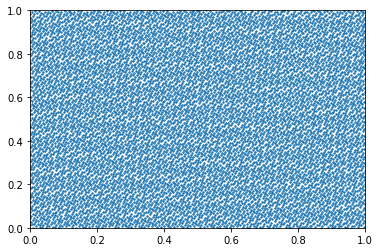

In [590]:
a,b = 0,1
n = 10000
sequence = Naive_LD_sequence(n,dim=2,a=a,b=b)
plt.scatter(sequence[0],sequence[1],s=2)
plt.axis([a,b,a,b])
plt.show()

But you can't transpose it on all interval $[a,b]$ such that $[3,5]$ for example

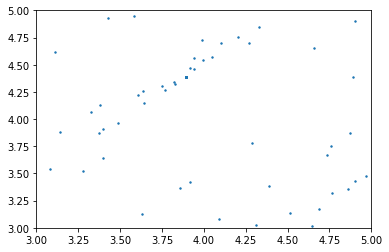

In [591]:
a,b = 3,5
n = 10000
sequence = Naive_LD_sequence(n,dim=2,a=a,b=b)
plt.scatter(sequence[0],sequence[1],s=2)
plt.axis([a,b,a,b])
plt.show()

(array([2.23762424e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.71287271e-04, 2.23762424e-03, 2.22979255e+00,
        2.01386181e-03, 2.68514908e-03]),
 array([0.5       , 0.94690256, 1.39380512, 1.84070768, 2.28761024,
        2.7345128 , 3.18141536, 3.62831792, 4.07522048, 4.52212304,
        4.9690256 ]),
 <a list of 10 Patch objects>)

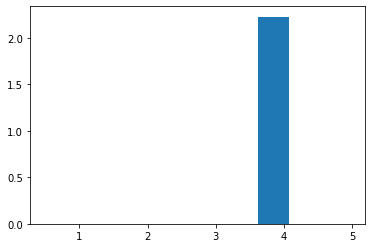

In [592]:
plt.hist(sequence[0],density=True)

Where a random sample on $[3,5]^2$ gives

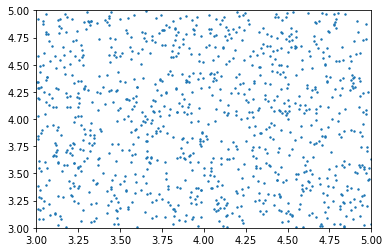

In [593]:
a,b = 3,5
n = 1000
sequence1 = Uniform_Continue(a,b,n)
sequence2 = Uniform_Continue(a,b,n)
plt.scatter(sequence1,sequence2,s=2)
plt.axis([a,b,a,b])
plt.show()

In [630]:
def QMC_naive(f,a,b,N=1000,alpha=0.05):
    exact_result = integrate.quad(f,a,b)[0]
    res = []
    conv = []
    sample = Naive_LD_sequence(N,1,a,b)[0]
    for i in range(N):
        res.append((b-a)*f(sample[i]))
        conv.append(abs(exact_result-np.mean(res)))
    sigma = np.std(res)
    sigma2 = np.var(res)
    quantil = ndtri(1-alpha/2)
    res = np.mean(res)
    print("Standard deviation :", sigma)
    print("Variance :",sigma2)
    print("Confidence interval of", 1-alpha,"% : [", res - quantil*sigma/math.sqrt(N), " : ",res + quantil*sigma/math.sqrt(N),"]")
    return res,conv

This QMC works on only on $[0,1]$

In [598]:
N=10000
print('\033[1m' + "Monte Carlo Standard : " + '\033[0m')
start_time = time.time()
res1,_ = MC(f1,0,1,N)
print("Result :",res1,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f1,0,1)[0]-res1),"\n \n")
print('\033[1m' + "Quasi Monte Carlo naive sequence : " + '\033[0m')
start_time = time.time()
res2,_ = QMC_naive(f1,0,1,N)
print("Result :",res2,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f1,0,1)[0]-res2))

Monte Carlo Standard : 
Standard deviation : 0.13911473954166115
Variance : 0.019352910757744222
Confidence interval of 0.95 % : [ 0.6912470237784911  :  0.6967002213628977 ]
Result : 0.6939736225706944 in 4.904543399810791 secondes
Error :  0.0008264420107489956 
 

Quasi Monte Carlo naive sequence : 
Standard deviation : 0.1398735037151551
Variance : 0.01956459704155351
Confidence interval of 0.95 % : [ 0.6905887584893242  :  0.6960716990827869 ]
Result : 0.6933302287860555 in 4.132723093032837 secondes
Error :  0.0001830482261101496


Quasi Monte Carlo with this sequence do not work very well for compute integral not in $[0,1]$

In [600]:
N=10000
print('\033[1m' + "Monte Carlo Standard : " + '\033[0m')
start_time = time.time()
res1,_ = MC(f2,3,5,N)
print("Result :",res1,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f2,3,5)[0]-res1),"\n \n")
print('\033[1m' + "Quasi Monte Carlo naive sequence : " + '\033[0m')
start_time = time.time()
res2,_ = QMC_naive(f2,3,5,N)
print("Result :",res2,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f2,3,5)[0]-res2))

Monte Carlo Standard : 
Standard deviation : 11.614523276781833
Variance : 134.897150946907
Confidence interval of 0.95 % : [ 42.63917010713696  :  43.09445105353885 ]
Result : 42.866810580337905 in 10.944684028625488 secondes
Error :  0.20014391367124063 
 

Quasi Monte Carlo naive sequence : 
Standard deviation : 0.929955477293994
Variance : 0.8648171897491
Confidence interval of 0.95 % : [ 39.83572906202258  :  39.87218264687702 ]
Result : 39.8539558544498 in 12.523303985595703 secondes
Error :  2.8127108122168636


### Van Der Corput

Van Der Corput sequence works better on all interval $[a,b]$ and even on multi dimensional space wheareas the base choice if prime for each direction

In [601]:
def VanDerCoput_sequence(n,base=2,a=0,b=1):
    sample =[a]
    for i in range(1,n):
        phi = 0.0
        number = str(np.base_repr(i,base=base))
        j = -len(number)
        for c in number:
            phi+= int(c,base)*pow(base,j)
            j = j+1
        sample.append(a + phi*(b-a))
    return sample

(array([1.0214011 , 1.00137363, 1.00137363, 0.99135989, 1.00137363,
        1.00137363, 0.99135989, 1.01138736, 1.00137363, 0.99135989]),
 array([4.        , 4.09986283, 4.19972565, 4.29958848, 4.3994513 ,
        4.49931413, 4.59917695, 4.69903978, 4.79890261, 4.89876543,
        4.99862826]),
 <a list of 10 Patch objects>)

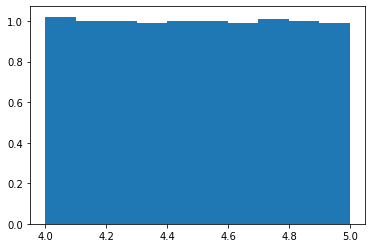

In [602]:
seq = VanDerCoput_sequence(1000,3,4,5)
plt.hist(seq,density=True)

In [603]:
def VanDerCoput_multidim_sequence(n,dim,a=0,b=1):
    base_array = [2]
    len_base = 1
    number = 3
    while len_base < dim:
        if (is_prime_Miller(number,10)):
            base_array.append(number)
            len_base +=1 
        number +=1  
    sample = []
    for d in range(dim):
        print("base :",base_array[d])
        sample.append(VanDerCoput_sequence(n,base_array[d],a,b))
    return sample

Van Der Corput Sequence in dimension $4$ on $a=3$ and $b=5$

base : 2
base : 3
base : 5
base : 7
base : 11
base : 13
base : 17
base : 19
base : 23
base : 29
base : 31


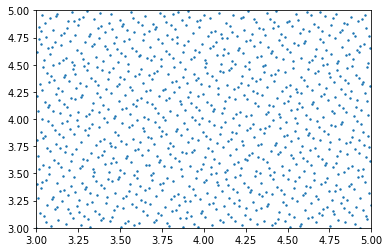

In [604]:
a,b = 3,5
n = 1000
sequence = VanDerCoput_multidim_sequence(n,11,a,b)
plt.scatter(sequence[1],sequence[0],s=2)
plt.axis([a,b,a,b])
plt.show()

Max dimension is 11 because of $\textit{np.base_repr()}$ allowed only to base 36.

Allowing greater base there is no limitation on the dimension.

Remarks : above 30 dimensions there is some limitations of the Van Der Corput sequence (called Halton sequence when it's in multidimensional)

(array([1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]),
 array([4.        , 4.09090909, 4.18181818, 4.27272727, 4.36363636,
        4.45454545, 4.54545455, 4.63636364, 4.72727273, 4.81818182,
        4.90909091]),
 <a list of 10 Patch objects>)

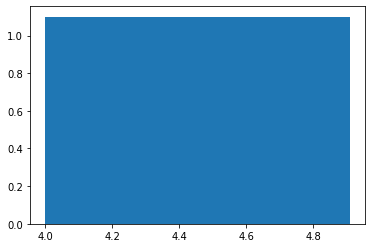

In [722]:
seq = VanDerCoput_sequence(20,11,4,5)
plt.hist(seq,density=True)

In [631]:
def QMC_VanDerCorput(f,a,b,N=1000,alpha=0.05):
    exact_result = integrate.quad(f,a,b)[0]
    res = []
    conv = []
    sample = VanDerCoput_sequence(N,2,a,b)
    for i in range(N):
        res.append((b-a)*f(sample[i]))
        conv.append(abs(exact_result-np.mean(res)))
    sigma = np.std(res)
    sigma2 = np.var(res)
    quantil = ndtri(1-alpha/2)
    res = np.mean(res)
    print("Standard deviation :", sigma)
    print("Variance :",sigma2)
    print("Confidence interval of", 1-alpha,"% : [", res - quantil*sigma/math.sqrt(N), " : ",res + quantil*sigma/math.sqrt(N),"]")
    return res,conv

In [607]:
N=10000
print('\033[1m' + "Monte Carlo Standard : " + '\033[0m')
start_time = time.time()
res1,_ = MC(f1,0,1,N)
print("Result :",res1,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f1,0,1)[0]-res1),"\n \n")
print('\033[1m' + "Quasi Monte Carlo Van Der Corput sequence : " + '\033[0m')
start_time = time.time()
res2,_ = QMC_VanDerCorput(f1,0,1,N)
print("Result :",res2,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f1,0,1)[0]-res2))

Monte Carlo Standard : 
Standard deviation : 0.1392396844689837
Variance : 0.01938768973102214
Confidence interval of 0.95 % : [ 0.689099300630018  :  0.6945573959655765 ]
Result : 0.6918283482977973 in 1.983659029006958 secondes
Error :  0.0013188322621481285 
 

Quasi Monte Carlo Van Der Corput sequence : 
Standard deviation : 0.1398461309548536
Variance : 0.019556940343042062
Confidence interval of 0.95 % : [ 0.6904920010478401  :  0.6959738686488159 ]
Result : 0.693232934848328 in 2.169420003890991 secondes
Error :  8.575428838264454e-05


In [608]:
N=10000
print('\033[1m' + "Monte Carlo Standard : " + '\033[0m')
start_time = time.time()
res1,_ = MC(f2,3,5,N)
print("Result :",res1,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f2,3,5)[0]-res1),"\n \n")
print('\033[1m' + "Quasi Monte Carlo Van Der Corput sequence : " + '\033[0m')
start_time = time.time()
res2,_ = QMC_VanDerCorput(f2,3,5,N)
print("Result :",res2,"in",time.time() - start_time,"secondes")
print("Error : ",abs(integrate.quad(f2,3,5)[0]-res2))

Monte Carlo Standard : 
Standard deviation : 11.546806205331572
Variance : 133.3287335434837
Confidence interval of 0.95 % : [ 42.4085459894686  :  42.86117247544687 ]
Result : 42.634859232457735 in 2.481370210647583 secondes
Error :  0.03180743420892895 
 

Quasi Monte Carlo Van Der Corput sequence : 
Standard deviation : 11.561649044330883
Variance : 133.67172862427722
Confidence interval of 0.95 % : [ 42.43322819291857  :  42.886436507494174 ]
Result : 42.65983235020637 in 4.168996095657349 secondes
Error :  0.0068343164602922


# Study of the convergence

First we study on $[3,5]$ for a smooth funnction $f(x) = \frac{1}{1+x}$

In [708]:
a ,b = 3,5
N = pow(10,5)
print("MC standard...")
_,conv_mc_standard = MC(f2,a,b,N)
print("MC anthitetic variable...")
_,conv_mc_anthitetic_variable = MC_anthitetic(f2,a,b,N)
print("MC control variate...")
_,conv_mc_control_variate =MC_control_variate(f2,a,b,N)
print("QMC...")
_,conv_qmc = QMC_VanDerCorput(f2,a,b,N)

MC standard...
Standard deviation : 11.571495863256445
Variance : 133.89951651336102
Confidence interval of 0.95 % : [ 42.593115169584905  :  42.73655428263248 ]
MC anthitetic variable...
Standard deviation : 0.5958736642267338
Variance : 0.3550654237189943
Confidence interval of 0.95 % : [ 42.66318148062014  :  42.67056787135951 ]
MC control variate...
mean t : 5.00028982387072
Standard deviation : 0.5985355280132282
Variance : 0.3582447782940739
Confidence interval of 0.95 % : [ 42.66481723430612  :  42.67223662124453 ]
QMC...
Standard deviation : 11.562294828541102
Variance : 133.6866617021083
Confidence interval of 0.95 % : [ 42.59416348972291  :  42.73748854765832 ]


Text(0, 0.5, 'Error')

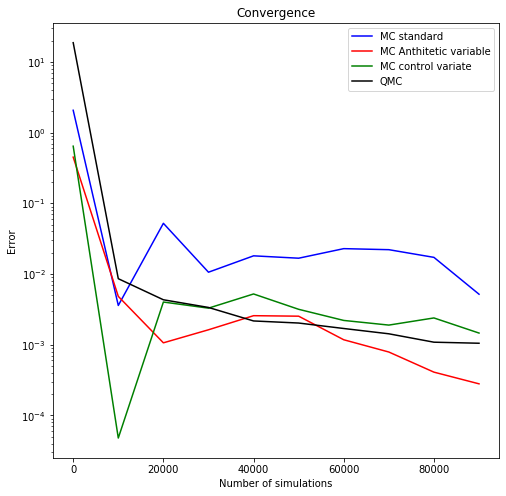

In [720]:
plt.figure(figsize=(8,8))
x = np.linspace(0,N,50)
plt.plot(range(N)[0::int(N/10)],conv_mc_standard[0::int(N/10)],color="b")
plt.plot(range(N)[0::int(N/10)],conv_mc_anthitetic_variable[0::int(N/10)],color="r")
plt.plot(range(N)[0::int(N/10)],conv_mc_control_variate[0::int(N/10)],color="g")
plt.plot(range(N)[0::int(N/10)],conv_qmc[0::int(N/10)],color="black")
plt.legend(['MC standard','MC Anthitetic variable','MC control variate','QMC'])
plt.yscale('log')
plt.title('Convergence')
plt.xlabel("Number of simulations")
plt.ylabel("Error")
#plt.xscale('log')